# Scratch notebook

Don't actually look at anything in this notebook

In [1]:
import pandas as pd
import scipy.io as spio
import matplotlib.pyplot as plt
import numpy as np

In [4]:
gene_to_eid = pd.read_csv('/ye/yelabstore2/mincheol/data/scrna-parameter-estimation/landed/gene_to_id.csv')

gene_list = pd.read_csv('/ye/yelabstore2/mincheol/data/scrna-parameter-estimation/landed/hg19/genes.tsv', sep='\t', header=None)
gene_list.columns = ['eid', 'gene']

In [18]:
# Retrive and filter mRNA matrix
gene_indices = gene_list[gene_list.eid.isin(gene_to_eid.eid)].index.values
gene_labels = gene_list[gene_list.eid.isin(gene_to_eid.eid)]\
    .merge(gene_to_eid, on='eid', how='left').gene_y.values
    


In [19]:
gene_labels

array(['CD45', 'CD8A', 'CD14', 'CD4', 'CD19'], dtype=object)

In [ ]:
mRNA_matrix = spio.mmread('/ye/yelabstore2/mincheol/data/scrna-parameter-estimation/landed/hg19/matrix.mtx').tocsr()

In [8]:
filtered_mRNA_matrix = mRNA_matrix[gene_indices, :].toarray()

In [9]:
filtered_mRNA_matrix

array([[1, 3, 2, ..., 3, 4, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
df_mRNA = pd.DataFrame(filtered_mRNA_matrix.T, columns=gene_labels)

In [13]:
gene_to_eid

,gene,eid
0,CD14,ENSG00000170458
1,CD19,ENSG00000177455
2,CD45,ENSG00000081237
3,CD4,ENSG00000010610
4,CD8A,ENSG00000153563


In [12]:
gene_labels

array(['PTPRC', 'CD8A', 'CD14', 'CD4', 'CD19'], dtype=object)

In [11]:
df_mRNA.head(5)

,PTPRC,CD8A,CD14,CD4,CD19
0,1,0,0,0,0
1,3,0,0,1,0
2,2,0,0,0,0
3,5,1,0,0,0
4,3,0,0,0,0


In [2]:
gene_to_eid = pd.read_csv('/ye/yelabstore2/mincheol/data/scrna-parameter-estimation/landed/gene_to_id.csv')

In [3]:
gene_to_eid

,gene,eid
0,CD14,ENSG00000170458
1,CD19,ENSG00000177455
2,CD45,ENSG00000081237
3,CD4,ENSG00000010610
4,CD8A,ENSG00000153563


In [19]:
genes = pd.read_csv('/ye/yelabstore2/george/CITE_Ab_Bakeoff/counts/hg19/CITESeq_mRNA/outs/filtered_gene_bc_matrices/hg19/genes.tsv', sep='\t', header=None)
genes.columns = ['eid', 'gene']

In [61]:
indices = genes[genes.eid.isin(gene_to_eid.eid)].index.values
gene_labels = genes[genes.eid.isin(gene_to_eid.eid)].gene.values

In [62]:
gene_labels

array(['PTPRC', 'CD8A', 'CD14', 'CD4', 'CD19'], dtype=object)

In [60]:
genes[genes.eid.isin(gene_to_eid.eid)]

,eid,gene
2576,ENSG00000081237,PTPRC
4064,ENSG00000153563,CD8A
9633,ENSG00000170458,CD14
20174,ENSG00000010610,CD4
25142,ENSG00000177455,CD19


In [30]:
mRNA_matrix = spio.mmread('/ye/yelabstore2/mincheol/data/scrna-parameter-estimation/landed/hg19/matrix.mtx').tocsr()

In [32]:
filtered_matrix = mRNA_matrix[indices, :]

In [63]:
mrna_matrix = pd.DataFrame(filtered_matrix.toarray().T, columns=gene_labels)

In [71]:
mrna_matrix.shape

(12684, 5)

In [66]:
mrna_matrix.head(5)

,PTPRC,CD8A,CD14,CD4,CD19
0,1,0,0,0,0
1,3,0,0,1,0
2,2,0,0,0,0
3,5,1,0,0,0
4,3,0,0,0,0


In [14]:
unnormed_df = pd.read_csv('/ye/yelabstore2/mincheol/data/scrna-parameter-estimation/landed/CITEseqADT.csv')

In [15]:
unnormed_values = unnormed_df.iloc[:, 1:].values

In [52]:
sample = unnormed_values[0, :]
sample = sample[sample < 20]

(array([2117., 5811., 4618., 1980.,  676.,  197.,   86.,   55.,   43.,
          20.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

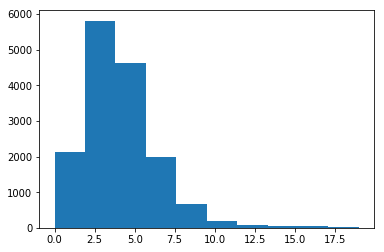

In [53]:
plt.hist(sample)